### **Importing the Modules**

In [55]:
# importing our modules

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Here we are loading our Dataset
data = pd.read_csv('UTI.csv')

# Loading Data

Reading the dataset

In [ ]:
data.head(10)

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
5,36.0,no,yes,no,no,no,no,no
6,36.2,no,no,yes,yes,yes,yes,no
7,36.2,no,yes,no,no,no,no,no
8,36.3,no,no,yes,yes,yes,yes,no
9,36.6,no,no,yes,yes,yes,yes,no


In [ ]:
print(data['Lumbar pain'])

0      yes
1       no
2      yes
3       no
4      yes
      ... 
115    yes
116     no
117    yes
118    yes
119    yes
Name: Lumbar pain, Length: 120, dtype: object


In [ ]:
data.isnull().sum()

Temperature of patient                                  0
Occurrence of nausea                                    0
Lumbar pain                                             0
Urine pushing (continuous need for urination)           0
Micturition pains                                       0
Burning of urethra, itch, swelling of urethra outlet    0
Inflammation of urinary bladder                         0
Nephritis of renal pelvis origin                        0
dtype: int64

In [ ]:
le = LabelEncoder()
#LABEL ENCOODER IS USED TO CONVERT CATEGOROCAL DATA INTO NUMBERS

In [ ]:
x = data.drop('Nephritis of renal pelvis origin', axis=1)
y = data['Nephritis of renal pelvis origin'].values

In [ ]:
y = le.fit_transform(y)
#here we fit the data into the label encoder so it can transform the values

In [ ]:
for _ in x.columns:
  if _ != 'Temperature of patients':
    x[_] = le.fit_transform(x[_])
    #looping through the values of the data and exempting the non categorical data and converting the rest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting our dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 100)


In [ ]:
# here we are printing the shape of the X and Y
print(X_train.shape)
print(y_train.shape)

(96, 7)
(96,)


# Defining our perfomance metrics

In [40]:
# here i am defining my performance metrics to check the performance of the model
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 3*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

In [ ]:
model_cnn = Sequential()
model_cnn.add(Dense(64, activation='relu', input_shape=(7,)))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


Fitting the model

In [41]:
history1=model_cnn.fit(X_train,y_train,epochs = 25,verbose = 1)

Epoch 1/25
3/3 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 1.0000 - precision: 0.7679 - recall: 1.0000 - auc: 0.9524 - f1_score: 1.3081
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 0.3922 - accuracy: 1.0000 - precision: 0.7679 - recall: 1.0000 - auc: 0.9570 - f1_score: 1.3058
Epoch 3/25
3/3 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 1.0000 - precision: 0.7679 - recall: 1.0000 - auc: 0.9614 - f1_score: 1.3020
Epoch 4/25
3/3 [==============================] - 0s 5ms/step - loss: 0.3790 - accuracy: 1.0000 - precision: 0.7679 - recall: 1.0000 - auc: 0.9590 - f1_score: 1.2944
Epoch 5/25
3/3 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 1.0000 - precision: 0.7818 - recall: 1.0000 - auc: 0.9715 - f1_score: 1.3121
Epoch 6/25
3/3 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 1.0000 - precision: 0.7818 - recall: 1.0000 - auc: 0.9732 - f1_score: 1.3162
Epoc

In [52]:
#==========================THE PERFORMANCE OF MY NEURAL NETWORK MODEL USING CNN===============================
# Network accuracy with ACCURACY SCORE
pred = model_cnn.predict(X_test)
print("Neural network accuracy: ", (accuracy_score(y_test, pred.round()), 3))

Neural network accuracy:  (0.9166666666666666, 3)


In [57]:
matrix = classification_report(pred.round(), y_test)

In [60]:
print('this is the classification report fot CNN\n',matrix)

this is the classification report fot CNN
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        15
         1.0       1.00      0.78      0.88         9

    accuracy                           0.92        24
   macro avg       0.94      0.89      0.91        24
weighted avg       0.93      0.92      0.91        24



Text(0.5, 1.0, 'Neural Network Confusion Matrix')

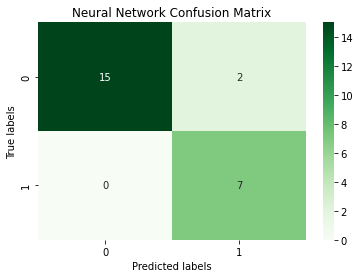

In [53]:
#plotting a confusion matrix to see how good our predictions does on a the datasets
import matplotlib.pyplot as plt
import seaborn as sns
cm_nn = confusion_matrix(y_test, pred.round())

ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Neural Network Confusion Matrix') 

roc_auc_score for CNN:  0.8529411764705882


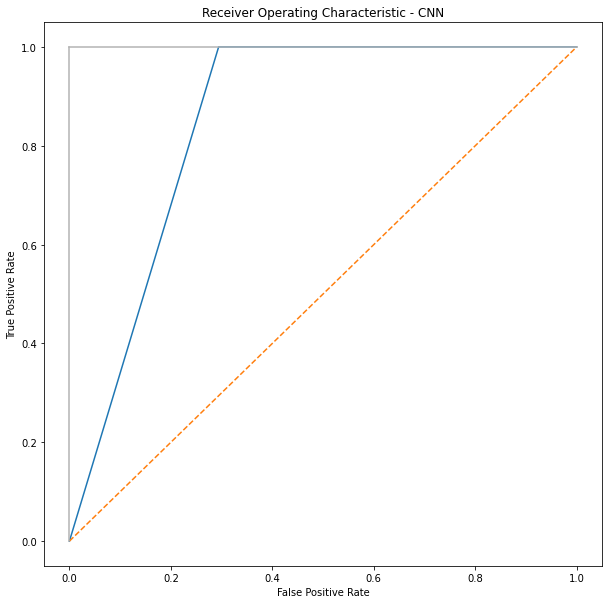

In [ ]:
# plot for CNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred.round())
print('roc_auc_score for CNN: ', roc_auc_score(y_test, pred.round()))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - CNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
#==========================MY ANN MODEL===============================

# Initialising the ANN
model_ann = Sequential()

# Adding the input layer and the first hidden layer
model_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model_ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

Fitting the model

In [73]:
# Fitting the ANN to the Training set
history = model_ann.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6340 - accuracy: 1.0000 - precision: 0.5309 - recall: 1.0000 - auc: 0.9291 - f1_score: 1.0436
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 1.0000 - precision: 0.5513 - recall: 1.0000 - auc: 0.9357 - f1_score: 1.0393
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 1.0000 - precision: 0.5733 - recall: 1.0000 - auc: 0.9375 - f1_score: 1.0764
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 1.0000 - precision: 0.5811 - recall: 1.0000 - auc: 0.9342 - f1_score: 1.0974
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 1.0000 - precision: 0.6056 - recall: 1.0000 - auc: 0.9346 - f1_score: 1.0882
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 1.0000 - precision: 0.6056 - recall: 1.0000 - auc: 0.9315 - f1_score:

In [65]:
# Network accuracy with ACCURACY SCORE
pred1 = model_ann.predict(X_test)
print("Neural network accuracy: ", (accuracy_score(y_test, pred1.round()), 3))

Neural network accuracy:  (0.375, 3)


In [68]:
# using classification report to test our predication
matrix = classification_report(pred1.round(), y_test)
print('this is the classification report fot ANN\n',matrix)

this is the classification report fot ANN
               precision    recall  f1-score   support

         0.0       0.12      1.00      0.21         2
         1.0       1.00      0.32      0.48        22

    accuracy                           0.38        24
   macro avg       0.56      0.66      0.35        24
weighted avg       0.93      0.38      0.46        24



Text(0.5, 1.0, 'Neural Network Confusion Matrix')

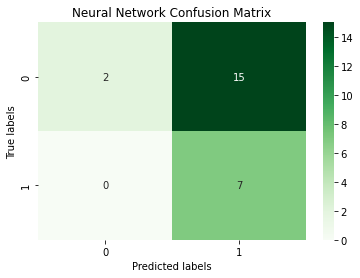

In [70]:
#plotting a confusion matrix to see how good our predictions does on a the datasets
cm_nn = confusion_matrix(y_test, pred1.round())

ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Neural Network Confusion Matrix') 

roc_auc_score for ANN:  0.7352941176470589


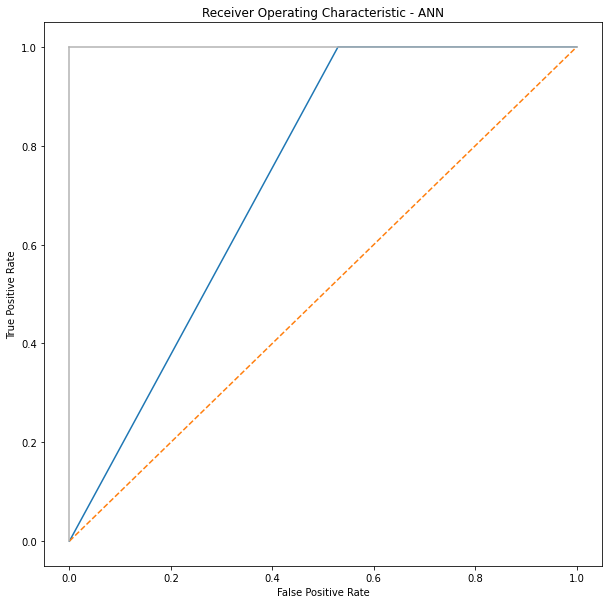

In [48]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred1.round())
print('roc_auc_score for ANN: ', roc_auc_score(y_test, pred1.round()))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ANN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
input_shape = [X_train.shape[1]]

In [ ]:
model_rnn = Sequential()
model_rnn.add(BatchNormalization(input_shape=input_shape))
#model1.add(SimpleRNN(128))
model_rnn.add(Dropout(0.3))
model_rnn.add(Flatten()) # flatten out the layers
model_rnn.add(Dense(512,activation='relu'))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(512,activation='relu'))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense_9 (Dense)             (None, 512)               4096      
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)              

Fitting the model

In [44]:
#X_train.shape[1]
model_rnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)
history2 = model_rnn.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 2s 7ms/step - loss: 0.2366 - accuracy: 1.0000 - precision: 0.6942 - recall: 0.9767 - auc: 0.9449 - f1_score: 1.3893
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0950 - accuracy: 1.0000 - precision: 0.8936 - recall: 0.9767 - auc: 0.9956 - f1_score: 1.3638
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0680 - accuracy: 1.0000 - precision: 0.9535 - recall: 0.9535 - auc: 0.9982 - f1_score: 1.4319
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.1230 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9535 - auc: 0.9844 - f1_score: 1.4750
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1149 - accuracy: 1.0000 - precision: 0.9524 - recall: 0.9302 - auc: 0.9917 - f1_score: 1.4117
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2111 - accuracy: 1.0000 - precision: 0.8913 - recall: 0.9535 - auc: 0.9811 - f1_score:

In [66]:
pred2 = model_rnn.predict(X_test)
# Network accuracy with ACCURACY SCORE
print("Neural network accuracy: ", (accuracy_score(y_test, pred2.round()), 3))

Neural network accuracy:  (1.0, 3)


In [69]:
# using classification report to test our predication
matrix = classification_report(pred2.round(), y_test)
print('this is the classification report fot RNN\n',matrix)

this is the classification report fot RNN
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



1.0

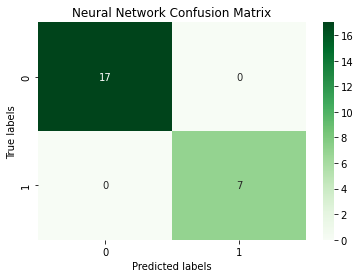

In [46]:
#plotting a confusion matrix to see how good our predictions does on a the datasets
cm_nn = confusion_matrix(y_test, pred2.round())

ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Neural Network Confusion Matrix') 

accuracy_score(y_test, pred2.round())

roc_auc_score for RNN:  1.0


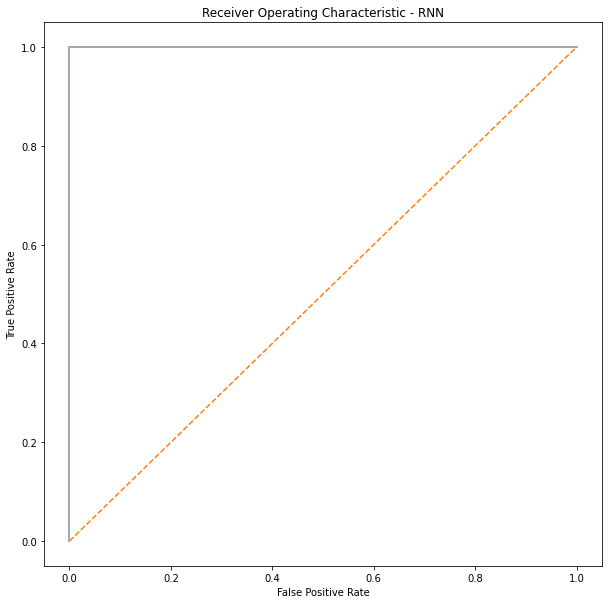

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred2.round())
print('roc_auc_score for RNN: ', roc_auc_score(y_test, pred2.round()))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()